# CS381 Data Analytics Final Project - Karanvir Singh

### Due on 5/13/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


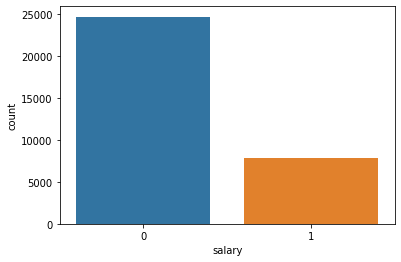

In [6]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

EDA - Exploratory Data Analysis

In [7]:
# Check for Missing Values

In [8]:
df.isnull().values.any()

False

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

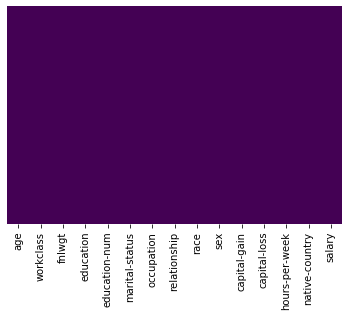

In [9]:
#Check Heatmap to make sure
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')
df.isnull().any()
df.isnull().sum()

# Outlier Checking. I used a boxplot to select each factor that affects capital-gain individually to see if there is any correlation among the facts. If needed outliers will be removed.

Shape
(32571, 15)

Hours Per Week


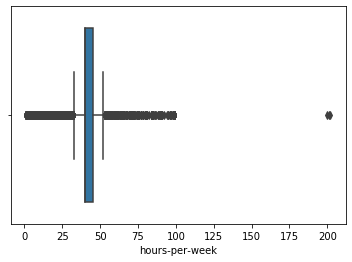

In [10]:
#Using a boxplot
sns.boxplot(x=df['hours-per-week']);
print("Shape")
print(df.shape)
print("\nHours Per Week")

In [11]:
print(df.shape)
df=df[df['hours-per-week'] < 100]
print("Shape")
print(df.shape)

(32571, 15)
Shape
(32568, 15)


Capital-gain


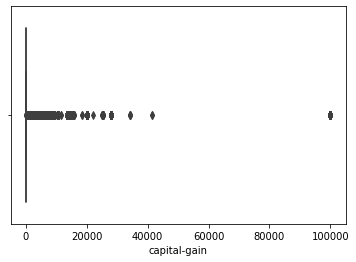

In [12]:
print("Capital-gain")
sns.boxplot(x=df['capital-gain']);

In [13]:
print("Shape")
print(df.shape)
df = df[df['capital-gain']<20000]
print("Shape forless than 20,000")
print(df.shape)

Shape
(32568, 15)
Shape forless than 20,000
(32315, 15)


Capital-loss
(32315, 15)
(32304, 15)


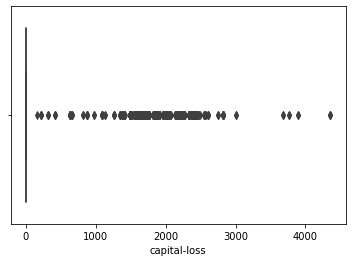

In [14]:
print("Capital-loss")
sns.boxplot(x=df['capital-loss']);
print(df.shape)
df = df[df['capital-loss'] < 3000]
print(df.shape)

In [15]:
df.groupby('salary').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,,,,,,
0,36.804290,190325.724201,9.596115,137.678106,51.865722,38.843707
1,44.054253,188184.771530,11.567027,1770.633526,200.067948,45.390572


Hours Per Week


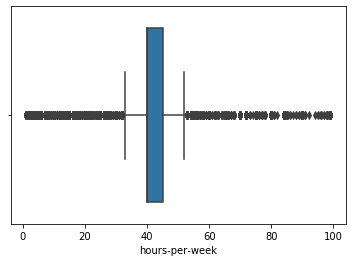

In [16]:
print("Hours Per Week")
sns.boxplot(x=df['hours-per-week']);

Age


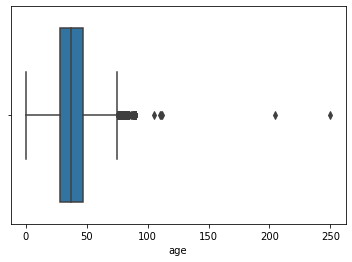

In [17]:
print("Age")
sns.boxplot(x=df['age']);

How much Earned via Marital Status


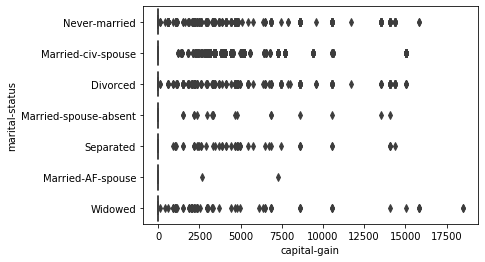

In [18]:
sns.boxplot(x='capital-gain', y ='marital-status', data=df)
print("How much Earned via Marital Status")

Distribution Graph. It is leptokurtic and shows somewhat of a positive skew 


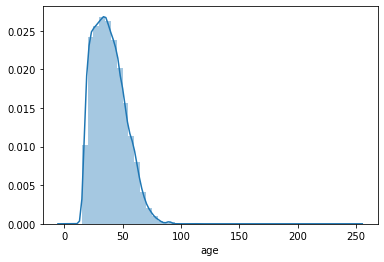

In [19]:
import seaborn as sns
sns.distplot(df['age'])
print("Distribution Graph. It is leptokurtic and shows somewhat of a positive skew ")

Very leptokurtic


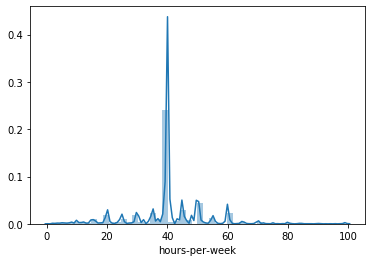

In [20]:
sns.distplot(df['hours-per-week'])
print("Very leptokurtic")

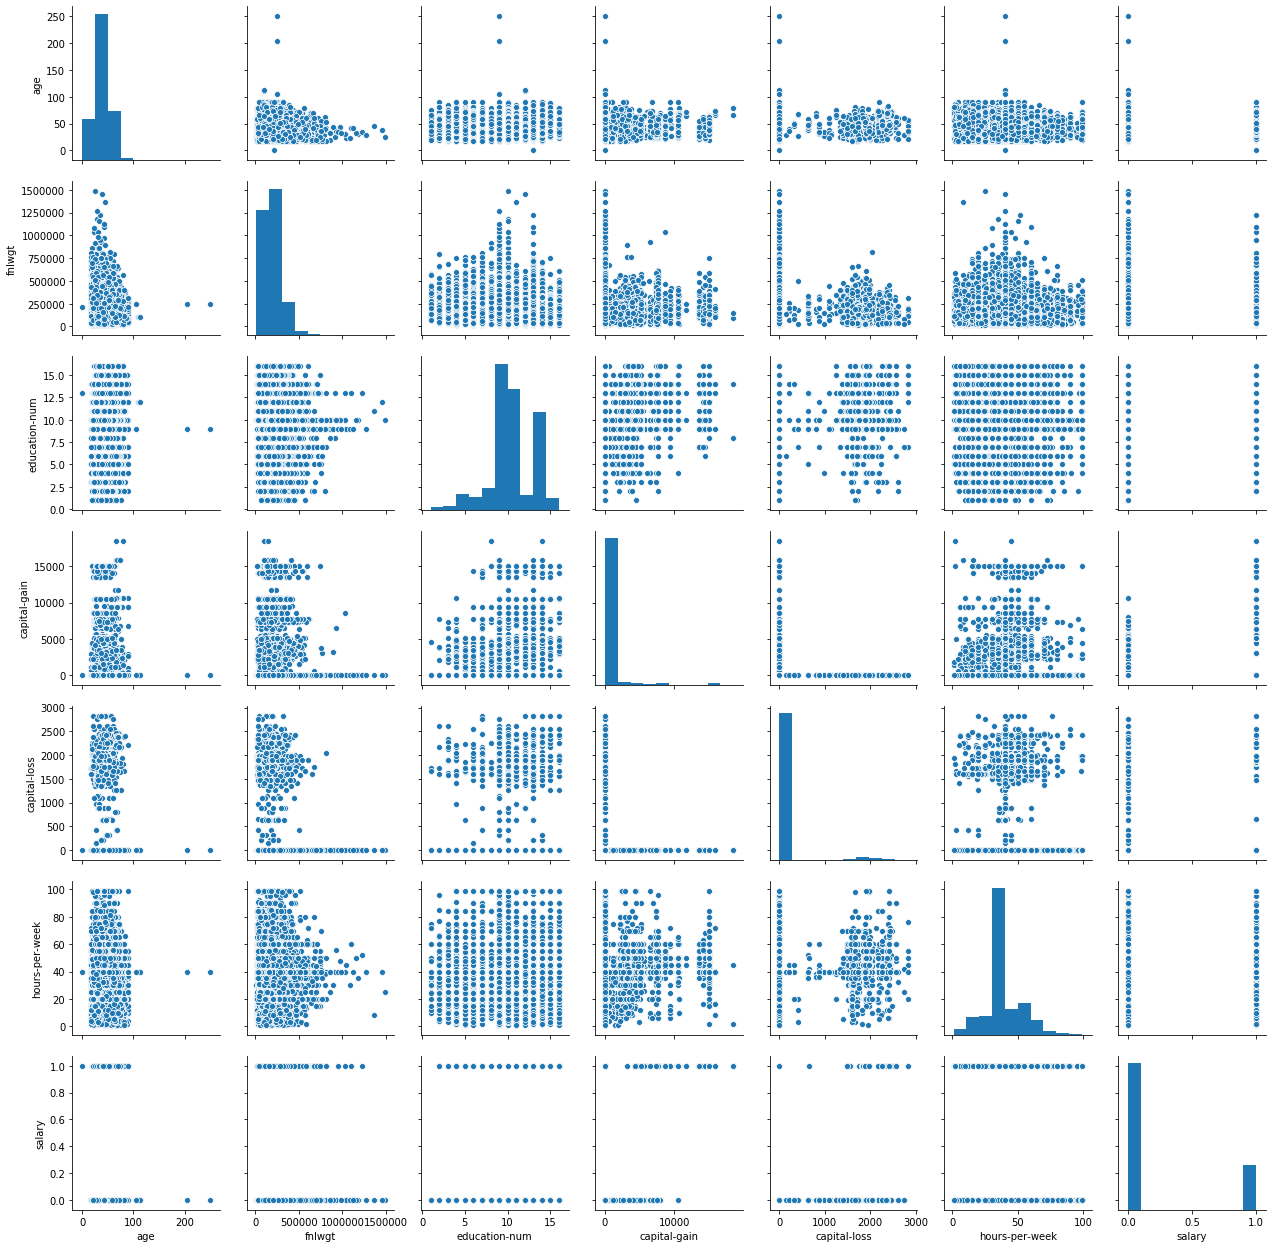

In [21]:
sns.pairplot(df)

# I am comparing everything to money because America runs on money not Dunkin

# More EDA

We find a big difference in probability gained due to gender


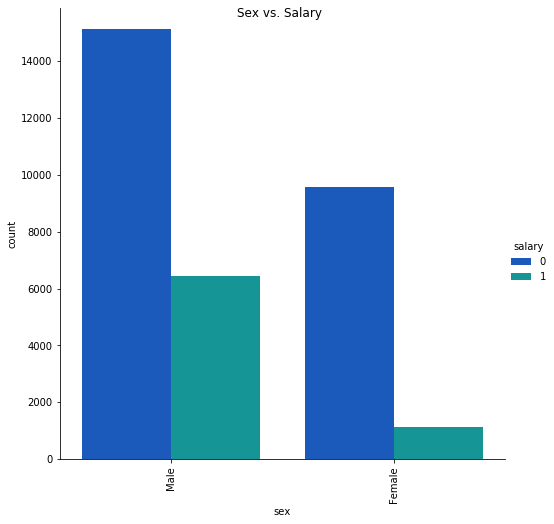

In [22]:
#Sex vs Salary
df1=sns.catplot(x='sex',hue='salary', data=df, height=7, kind='count', palette='winter')
df1.set_xticklabels(rotation=90);
df1.fig.suptitle('Sex vs. Salary');
print("We find a big difference in probability gained due to gender")

Dataset shows a big difference of salary interms of race


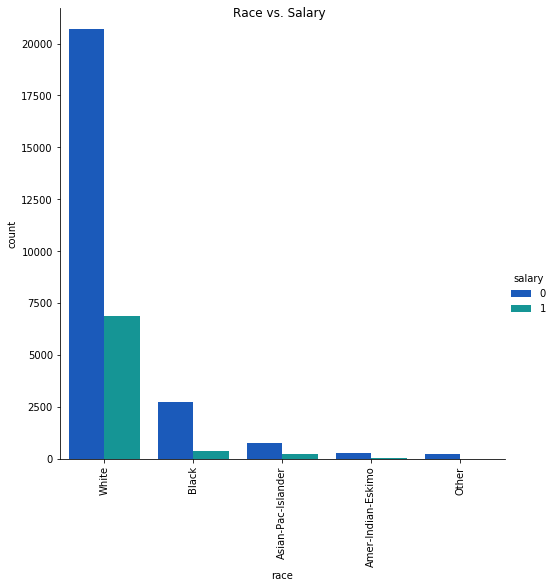

In [23]:
#Race vs. Salary
df1=sns.catplot(x='race',hue='salary', data=df, height=7, kind='count', palette='winter')
df1.set_xticklabels(rotation=90);
df1.fig.suptitle('Race vs. Salary');
print("Dataset shows a big difference of salary interms of race")

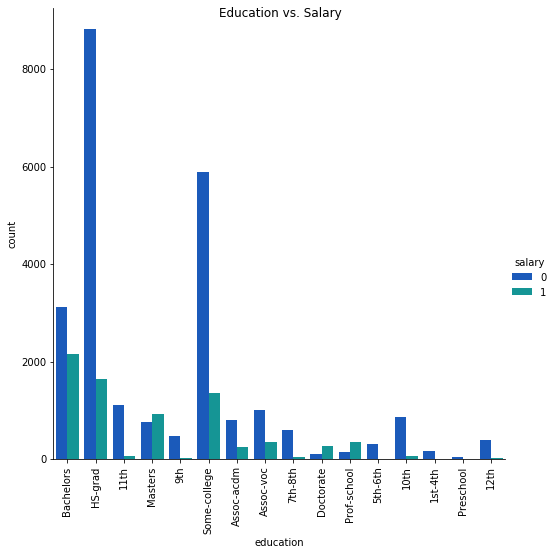

In [24]:
#Race vs. Education
df2=sns.catplot(x='education',hue='salary', data=df, height=7, kind='count', palette='winter')
df2.set_xticklabels(rotation=90);
df2.fig.suptitle('Education vs. Salary');

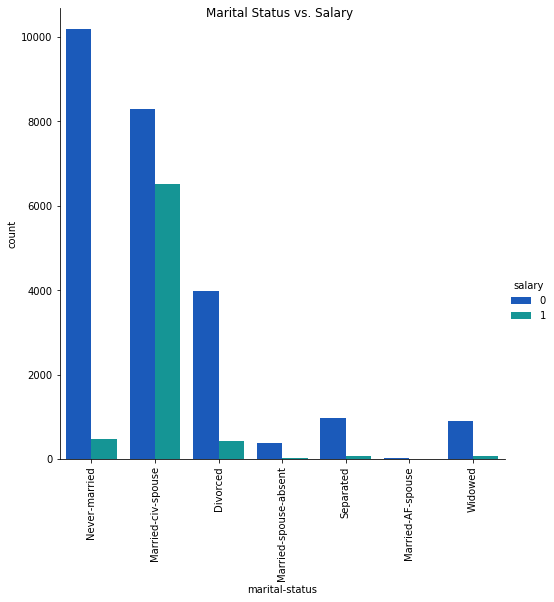

In [25]:
#Marital Status vs. Salary
df3=sns.catplot(x='marital-status',hue='salary', data=df, height=7, kind='count', palette='winter')
df3.set_xticklabels(rotation=90);
df3.fig.suptitle('Marital Status vs. Salary');

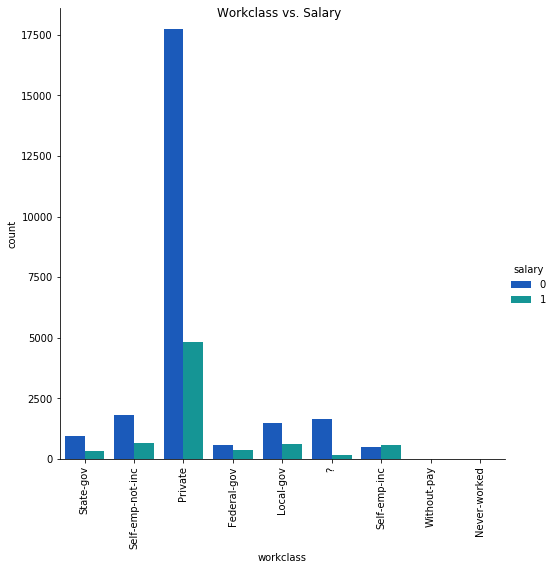

In [26]:
#Workclass vs. Salary
df4=sns.catplot(x='workclass',hue='salary', data=df, height=7, kind='count', palette='winter')
df4.set_xticklabels(rotation=90);
df4.fig.suptitle('Workclass vs. Salary');

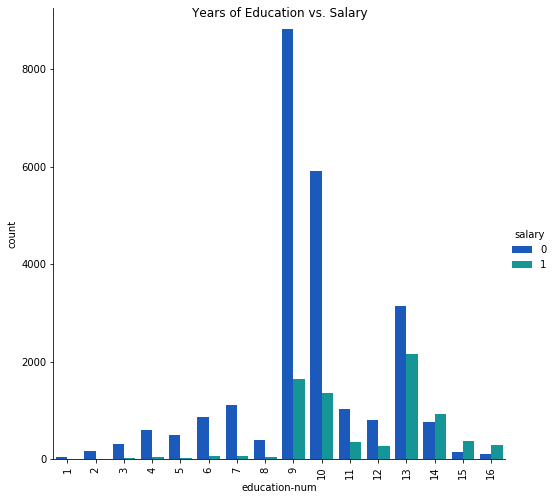

In [27]:
#Years of education vs salary
df5=sns.catplot(x='education-num',hue='salary', data=df, height=7, kind='count', palette='winter')
df5.set_xticklabels(rotation=90);
df5.fig.suptitle('Years of Education vs. Salary');

# Creating Categorical Variables

In [28]:
work_class = pd.get_dummies(df['workclass'],drop_first=True)
martial = pd.get_dummies(df['marital-status'], drop_first=True)
gender = pd.get_dummies(df['sex'], drop_first=True)
occup = pd.get_dummies(df['occupation'], drop_first=True)
educ = pd.get_dummies(df['education'], drop_first=True)
rela = pd.get_dummies(df['relationship'], drop_first=True)
gender.head()
gender.tail()

,Male
32566,0
32567,1
32568,0
32569,1
32570,0


In [29]:
df6=df[['salary', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' ]]
df7 = pd.concat([df6, educ, gender, work_class, occup, rela], axis=1)
df7.head()
df7.tail()

,salary,age,education-num,capital-gain,capital-loss,hours-per-week,11th,12th,1st-4th,5th-6th,...,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife
32566,0,27,12,0,0,38,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32567,1,40,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32568,0,58,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32569,0,22,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32570,1,52,9,15024,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df7

,salary,age,education-num,capital-gain,capital-loss,hours-per-week,11th,12th,1st-4th,5th-6th,...,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,39,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,50,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,38,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,53,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,28,13,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32566,0,27,12,0,0,38,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32567,1,40,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32568,0,58,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32569,0,22,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Test Training Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df7.drop('salary',axis=1),
                                                   df7['salary'], test_size=0.30,
                                                   random_state=101)
model = LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(y_test,predictions)),2))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7413
           1       0.73      0.58      0.65      2279

    accuracy                           0.85      9692
   macro avg       0.80      0.76      0.78      9692
weighted avg       0.84      0.85      0.84      9692

Accuracy Score: 0.85 


Support Vector Machine

In [32]:
model = svm.SVC(kernel='rbf', C=5, gamma=.01)
model.fit(x_train, y_train);


In [33]:
print('\nModel\n')
print(model)
#classification reprot
print('\nPredictions:')
predictions = model.predict(x_test);
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: %s' % round((accuracy_score(y_test,predictions)),2))


Model

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predictions:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7413
           1       0.80      0.56      0.66      2279

    accuracy                           0.86      9692
   macro avg       0.84      0.76      0.79      9692
weighted avg       0.86      0.86      0.85      9692

Accuracy Score: 0.86


K Fold Cross Validation

In [34]:
#Evaluation of score via cross validation
import random 
from sklearn.model_selection import cross_val_score

In [35]:
x=df7.drop(columns=['salary'])
y=df7['salary']
score_vec = {}

x_train, x_test, y_train, y_test =train_test_split(df7.drop('salary',axis=1),df7['salary'], test_size=0.30, random_state=random.randint(1,10000))
for i in range(1,11):
    model = DecisionTreeClassifier(max_depth=10,criterion='gini')
    
    scores = cross_val_score(estimator=model, X=x, y=y, cv=10, n_jobs=5)
    score_vec[i] = round(scores.mean(),2)

In [36]:
#prints out array of vector scores
score_vec

{1: 0.85,
 2: 0.85,
 3: 0.85,
 4: 0.85,
 5: 0.85,
 6: 0.85,
 7: 0.85,
 8: 0.85,
 9: 0.85,
 10: 0.85}

Decision Tree

In [37]:
x = df7.drop('salary', axis =1)
y = df7['salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
model=DecisionTreeClassifier(max_depth=10, criterion='gini')
model.fit(x_train, y_train);

In [38]:
print('\nModel\n')
predictions = model.predict(x_test)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: %s' % round(accuracy_score(y_test,predictions),2))


Model


Confusion Matrix:
[[7029  398]
 [1093 1172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      7427
           1       0.75      0.52      0.61      2265

    accuracy                           0.85      9692
   macro avg       0.81      0.73      0.76      9692
weighted avg       0.84      0.85      0.84      9692

Accuracy Score: 0.85


Random Forest

In [39]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)

In [40]:
print('\nClassification Report:')
print(classification_report(y_test,rfc_pred))
print('Accuracy Score: %s ' % round(accuracy_score(y_test,rfc_pred),2))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7427
           1       0.68      0.60      0.64      2265

    accuracy                           0.84      9692
   macro avg       0.78      0.76      0.77      9692
weighted avg       0.83      0.84      0.84      9692

Accuracy Score: 0.84 
